In [2]:
import pandas as pd
from sklearn.metrics import r2_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from utils.metrics import partsMetrics,allMetrics
from utils.plots import exp_vs_predict

In [3]:
df=pd.read_csv('processed_outliers.csv')
print('Data shape:',df.shape)

Data shape: (519, 7)


In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(519, 6)
(519,)


In [4]:
param_grid=[
    {
        'n_neighbors' : range(1,100,2),
        'weights' : ['uniform','distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [15,30],
        'metric' : ['minkowski','euclidean','manhattan']
    },
    {
        'n_neighbors' : range(1,100,2),
        'weights' : ['uniform','distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [15,30],
        'metric' : ['minkowski'],
        'p': [3]
    }
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def train_model(X_train,y_train):
    reg = KNeighborsRegressor(n_jobs=-1)
    grid=GridSearchCV(reg,param_grid,cv=5,scoring=make_scorer(r2_score),n_jobs=2)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    return grid

In [5]:
model=train_model(X_train,y_train)

{'algorithm': 'auto', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.8356065593783983


In [5]:
best_params={'algorithm': 'auto', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
reg=KNeighborsRegressor(**best_params)
partsMetrics(df,reg)

train rmse: 0.19113215674104286
val rmse: 4.650290092319486
test rmse: 4.599668123212265

train si: 0.015583503409813711
val si: 0.37941781848627004
test si: 0.33052268694401676

train r2: 0.999754003216552
val r2: 0.8698446492702789
test r2: 0.8968276318656829

train mape: 0.01527079710848825
val mape: 45.79589086924587
test mape: 189.47164844694723


In [6]:
allMetrics(df,reg)

all rmse: 0.17229886209879477
all si: 0.013862744087523731
all r2: 0.9998116470132578
all mape: 0.013206363313220339


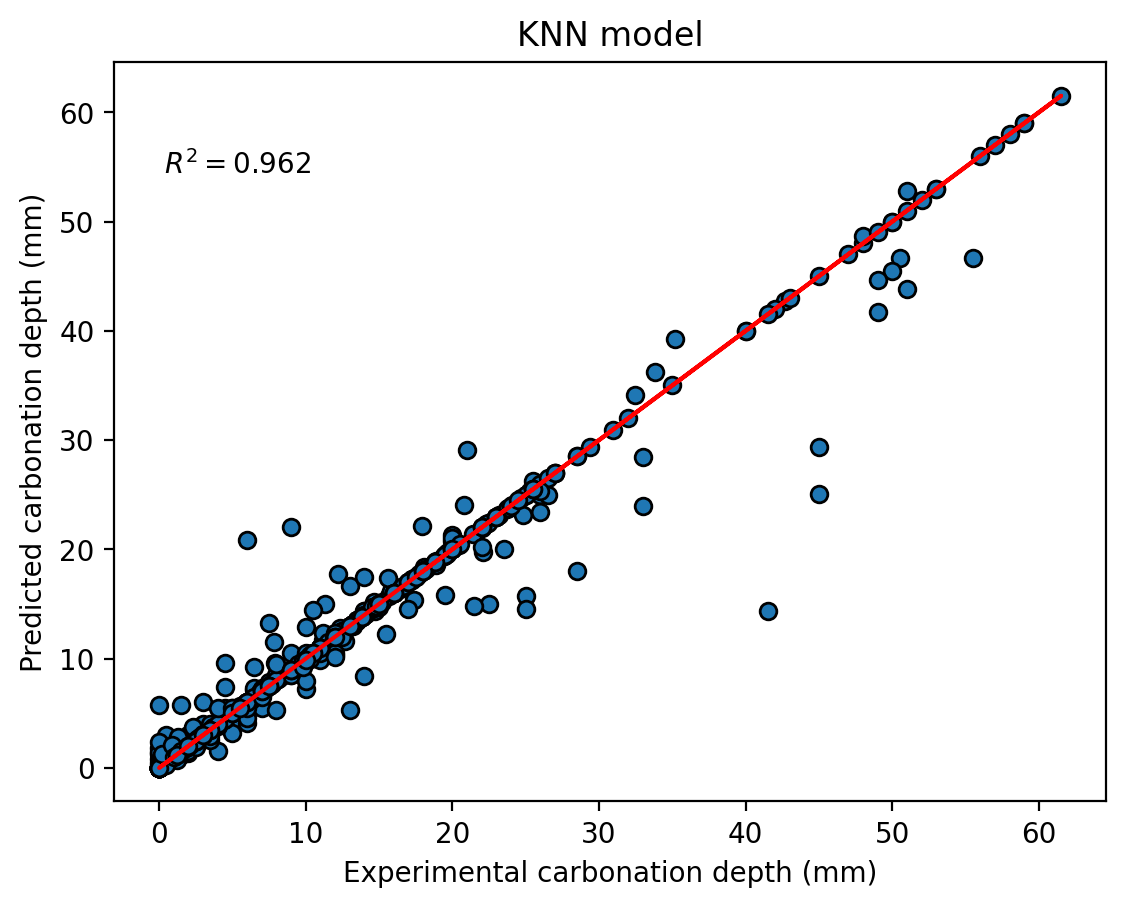

In [7]:
exp_vs_predict(df,reg,'KNN model')